#CUSTOMER SEGMENTATION  -  BATCH-2 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [4]:
import pandas as pd
data = pd.read_csv("data.csv", encoding= 'unicode_escape')

In [5]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [6]:
data.shape

(541909, 8)

In [7]:
data.keys()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
data.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [9]:
data = data.loc[data["Quantity"]>0]
data.shape

(531285, 8)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      531285 non-null object
StockCode      531285 non-null object
Description    530693 non-null object
Quantity       531285 non-null int64
InvoiceDate    531285 non-null object
UnitPrice      531285 non-null float64
CustomerID     397924 non-null float64
Country        531285 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


In [11]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      531285 non-null object
StockCode      531285 non-null object
Description    530693 non-null object
Quantity       531285 non-null int64
InvoiceDate    531285 non-null datetime64[ns]
UnitPrice      531285 non-null float64
CustomerID     397924 non-null float64
Country        531285 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [12]:
data["Sale"] = data.Quantity * data.UnitPrice
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country   Sale  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34

# Monetary

In [13]:
monetary = data.groupby("CustomerID").Sale.sum()
monetary = monetary.reset_index()
monetary.head()

CustomerID      Sale
0     12346.0  77183.60
1     12347.0   4310.00
2     12348.0   1797.24
3     12349.0   1757.55
4     12350.0    334.40

# Frequency

In [14]:
frequency = data.groupby("CustomerID").InvoiceNo.count()
frequency = frequency.reset_index()
frequency.head()

CustomerID  InvoiceNo
0     12346.0          1
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17

# Recency

In [15]:
LastDate = max(data.InvoiceDate)
LasDate = LastDate + pd.DateOffset(days = 1)
data["Diff"] = LastDate - data.InvoiceDate
data["Diff"] = data["Diff"].dt.days
recency = data.groupby("CustomerID").Diff.min()
recency = recency.reset_index()
recency.head()

CustomerID  Diff
0     12346.0   325
1     12347.0     1
2     12348.0    74
3     12349.0    18
4     12350.0   309

# RMF Combined DataFrame

In [16]:
RMF = monetary.merge(frequency, on = "CustomerID")
RMF = RMF.merge(recency, on = "CustomerID")
RMF.columns = ["CustomerID", "Monetary", "Frequency", "Recency"]
RMF

CustomerID  Monetary  Frequency  Recency
0        12346.0  77183.60          1      325
1        12347.0   4310.00        182        1
2        12348.0   1797.24         31       74
3        12349.0   1757.55         73       18
4        12350.0    334.40         17      309
5        12352.0   2506.04         85       35
6        12353.0     89.00          4      203
7        12354.0   1079.40         58      231
8        12355.0    459.40         13      213
9        12356.0   2811.43         59       22
10       12357.0   6207.67        131       32
11       12358.0   1168.06         19        1
12       12359.0   6372.58        248       57
13       12360.0   2662.06        129       51
14       12361.0    189.90         10      286
15       12362.0   5226.23        266        2
16       12363.0    552.00         23      109
17       12364.0   1313.10         85        7
18       12365.0    641.38         22      290
19       12367.0    168.90         11        3
20       12370.0   3545.69        167       50
21       12371.0   1887.96         63       44
22       12372.0   1298.04         52       71
23       12373.0    364.60         14      310
24       12374.0    742.93         33       24
25       12375.0    457.50         17       10
26       12377.0   1628.12         77      314
27       12378.0   4008.62        219      129
28       12379.0    852.24         40       81
29       12380.0   2724.81        104       21
...          ...       ...        ...      ...
4309     18242.0   2232.49         78       71
4310     18245.0   2567.06        175        6
4311     18246.0    596.10          4       23
4312     18248.0    804.02         47      122
4313     18249.0     95.34          8       16
4314     18250.0    349.27         21      309
4315     18251.0   4314.72         16       86
4316     18252.0    526.67         98       50
4317     18255.0    103.30          6       88
4318     18257.0   2337.63        118       38
4319     18259.0   2338.60         42       24
4320     18260.0   2643.20        134      172
4321     18261.0    324.24         21       42
4322     18262.0    149.48         13      139
4323     18263.0   1213.16         61       25
4324     18265.0    801.51         46       71
4325     18268.0     25.50          1      133
4326     18269.0    168.60          7      365
4327     18270.0    283.15         11       37
4328     18272.0   3078.58        166        2
4329     18273.0    204.00          3        1
4330     18274.0    175.92         11       29
4331     18276.0    335.86         14       43
4332     18277.0    110.38          8       57
4333     18278.0    173.90          9       73
4334     18280.0    180.60         10      277
4335     18281.0     80.82          7      180
4336     18282.0    178.05         12        7
4337     18283.0   2094.88        756        3
4338     18287.0   1837.28         70       42

[4339 rows x 4 columns]

In [17]:
RMF1 = pd.DataFrame(RMF,columns= ["Monetary","Frequency","Recency"])
RMF1.head() 

Monetary  Frequency  Recency
0  77183.60          1      325
1   4310.00        182        1
2   1797.24         31       74
3   1757.55         73       18
4    334.40         17      309

# PreProcess the data

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
RMF = ss.fit_transform(RMF1)
RMF1 = pd.DataFrame(RMF1, columns=["Monetary", "Frequency", "Recency"])
RMF1

C:\Users\sowji\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sowji\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Monetary  Frequency  Recency
0     77183.60          1      325
1      4310.00        182        1
2      1797.24         31       74
3      1757.55         73       18
4       334.40         17      309
5      2506.04         85       35
6        89.00          4      203
7      1079.40         58      231
8       459.40         13      213
9      2811.43         59       22
10     6207.67        131       32
11     1168.06         19        1
12     6372.58        248       57
13     2662.06        129       51
14      189.90         10      286
15     5226.23        266        2
16      552.00         23      109
17     1313.10         85        7
18      641.38         22      290
19      168.90         11        3
20     3545.69        167       50
21     1887.96         63       44
22     1298.04         52       71
23      364.60         14      310
24      742.93         33       24
25      457.50         17       10
26     1628.12         77      314
27     4008.62        219      129
28      852.24         40       81
29     2724.81        104       21
...        ...        ...      ...
4309   2232.49         78       71
4310   2567.06        175        6
4311    596.10          4       23
4312    804.02         47      122
4313     95.34          8       16
4314    349.27         21      309
4315   4314.72         16       86
4316    526.67         98       50
4317    103.30          6       88
4318   2337.63        118       38
4319   2338.60         42       24
4320   2643.20        134      172
4321    324.24         21       42
4322    149.48         13      139
4323   1213.16         61       25
4324    801.51         46       71
4325     25.50          1      133
4326    168.60          7      365
4327    283.15         11       37
4328   3078.58        166        2
4329    204.00          3        1
4330    175.92         11       29
4331    335.86         14       43
4332    110.38          8       57
4333    173.90          9       73
4334    180.60         10      277
4335     80.82          7      180
4336    178.05         12        7
4337   2094.88        756        3
4338   1837.28         70       42

[4339 rows x 3 columns]

# Analysis

In [19]:
from sklearn.cluster import KMeans
ssd = []
for k in range(1,10):
    km = KMeans(n_clusters = k,max_iter=50)
    km.fit(RMF1)
    ssd.append(km.inertia_)

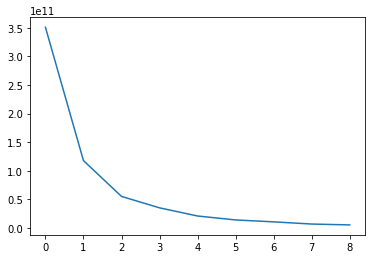

In [20]:
plt.plot(ssd)

In [21]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(RMF1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(RMF1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.9844437972674112
For n_clusters=3, the silhouette score is 0.9577964555238649
For n_clusters=4, the silhouette score is 0.9541458792498446
For n_clusters=5, the silhouette score is 0.8362879469398958
For n_clusters=6, the silhouette score is 0.7734615911819522
For n_clusters=7, the silhouette score is 0.7296257796886099
For n_clusters=8, the silhouette score is 0.7304739027518417


In [22]:
model = KMeans(n_clusters = 5)
ClusterID = model.fit_predict(RMF1)
RMF1["ClusterID"] = ClusterID
RMF1

Monetary  Frequency  Recency  ClusterID
0     77183.60          1      325          2
1      4310.00        182        1          0
2      1797.24         31       74          0
3      1757.55         73       18          0
4       334.40         17      309          0
5      2506.04         85       35          0
6        89.00          4      203          0
7      1079.40         58      231          0
8       459.40         13      213          0
9      2811.43         59       22          0
10     6207.67        131       32          4
11     1168.06         19        1          0
12     6372.58        248       57          4
13     2662.06        129       51          0
14      189.90         10      286          0
15     5226.23        266        2          0
16      552.00         23      109          0
17     1313.10         85        7          0
18      641.38         22      290          0
19      168.90         11        3          0
20     3545.69        167       50          0
21     1887.96         63       44          0
22     1298.04         52       71          0
23      364.60         14      310          0
24      742.93         33       24          0
25      457.50         17       10          0
26     1628.12         77      314          0
27     4008.62        219      129          0
28      852.24         40       81          0
29     2724.81        104       21          0
...        ...        ...      ...        ...
4309   2232.49         78       71          0
4310   2567.06        175        6          0
4311    596.10          4       23          0
4312    804.02         47      122          0
4313     95.34          8       16          0
4314    349.27         21      309          0
4315   4314.72         16       86          0
4316    526.67         98       50          0
4317    103.30          6       88          0
4318   2337.63        118       38          0
4319   2338.60         42       24          0
4320   2643.20        134      172          0
4321    324.24         21       42          0
4322    149.48         13      139          0
4323   1213.16         61       25          0
4324    801.51         46       71          0
4325     25.50          1      133          0
4326    168.60          7      365          0
4327    283.15         11       37          0
4328   3078.58        166        2          0
4329    204.00          3        1          0
4330    175.92         11       29          0
4331    335.86         14       43          0
4332    110.38          8       57          0
4333    173.90          9       73          0
4334    180.60         10      277          0
4335     80.82          7      180          0
4336    178.05         12        7          0
4337   2094.88        756        3          0
4338   1837.28         70       42          0

[4339 rows x 4 columns]

In [23]:
km_cluster_Sale = RMF1.groupby("ClusterID").Monetary.mean()
km_cluster_Recency = RMF1.groupby("ClusterID").Recency.mean()
km_cluster_Frequency = RMF1.groupby("ClusterID").Frequency.mean()

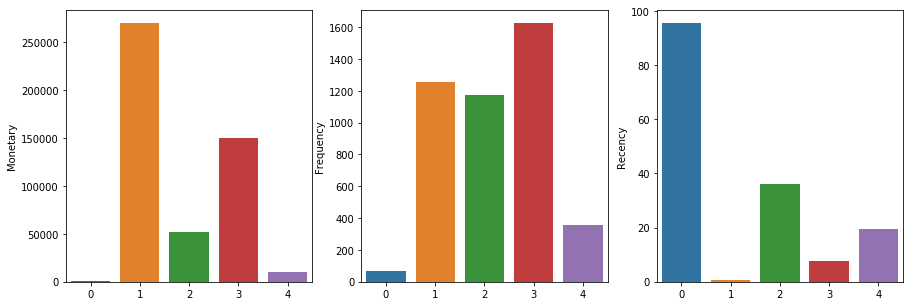

In [24]:
import seaborn as sns
fig, axs = plt.subplots(1,3, figsize = (15,5))
sns.barplot(x = [0,1,2,3,4], y= km_cluster_Sale,ax = axs[0])
sns.barplot(x = [0,1,2,3,4], y= km_cluster_Frequency,ax = axs[1])
sns.barplot(x = [0,1,2,3,4], y= km_cluster_Recency,ax = axs[2])

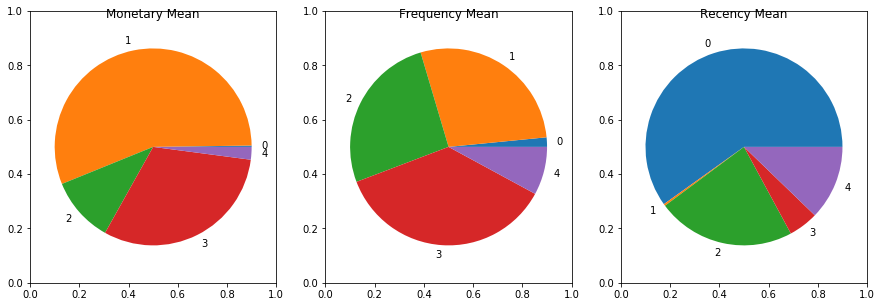

In [25]:
fig, axs = plt.subplots(1,3, figsize = (15, 5))
ax1 = fig.add_subplot(1,3,1)
ax1.pie(km_cluster_Sale,labels = [0,1,2,3,4])
plt.title("Monetary Mean")

ax2 = fig.add_subplot(1,3,2)
ax2.pie(km_cluster_Frequency,labels = [0,1,2,3,4])
plt.title("Frequency Mean")

ax3 = fig.add_subplot(1,3,3)
ax3.pie(km_cluster_Recency,labels = [0,1,2,3,4])
plt.title("Recency Mean")
plt.axis("off")
plt.show()

# Hierachial Clustering

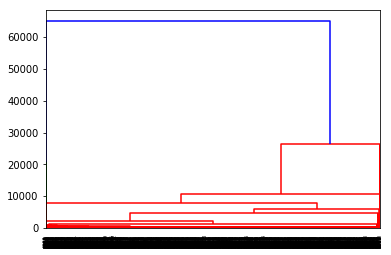

In [26]:
#Single linkage

mergings = linkage(RMF1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

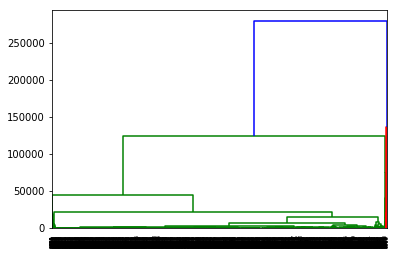

In [27]:
# Complete linkage

mergings = linkage(RMF1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

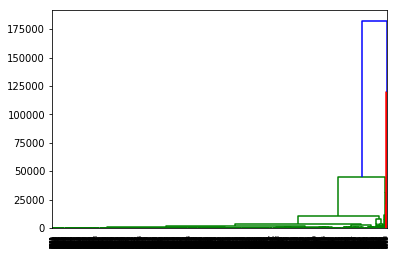

In [28]:
# Average linkage

mergings = linkage(RMF1, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [29]:
# 3 clusters

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
RMF1['cluster_labels'] = cluster_labels
RMF1.head()

Monetary  Frequency  Recency  ClusterID  cluster_labels
0  77183.60          1      325          2               0
1   4310.00        182        1          0               0
2   1797.24         31       74          0               0
3   1757.55         73       18          0               0
4    334.40         17      309          0               0

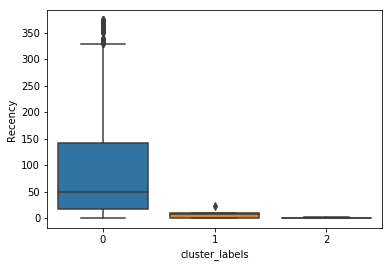

In [31]:
sns.boxplot(x='cluster_labels', y='Recency', data=RMF1)

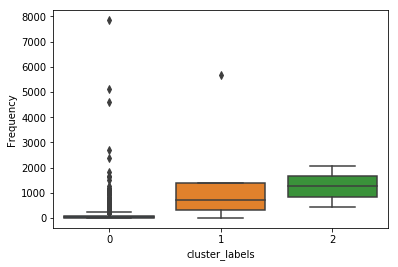

In [32]:
sns.boxplot(x='cluster_labels', y='Frequency', data=RMF1)

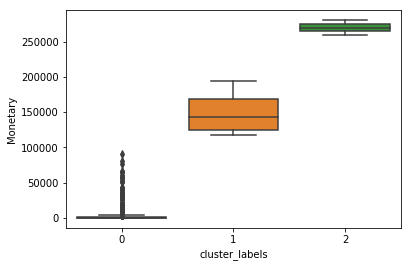

In [33]:
sns.boxplot(x='cluster_labels', y='Monetary', data=RMF1)

# DBSCAN Algorithm

In [34]:
from sklearn.cluster import DBSCAN
from itertools import product

db = DBSCAN(eps=0.8, min_samples=7, metric='euclidean')
db.fit(RMF1)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=7, n_jobs=None, p=None)

In [35]:
db.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [36]:
RMF1['label']=db.labels_
RMF1.head()

Monetary  Frequency  Recency  ClusterID  cluster_labels  label
0  77183.60          1      325          2               0     -1
1   4310.00        182        1          0               0     -1
2   1797.24         31       74          0               0     -1
3   1757.55         73       18          0               0     -1
4    334.40         17      309          0               0     -1

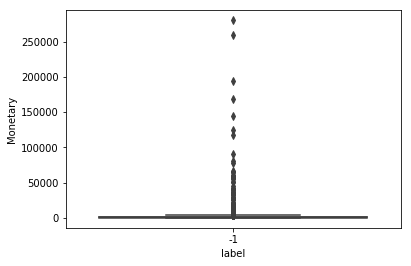

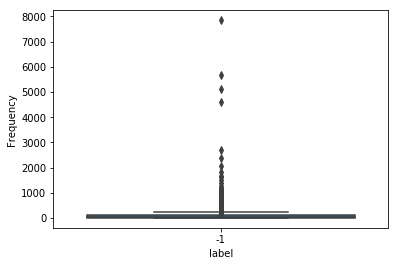

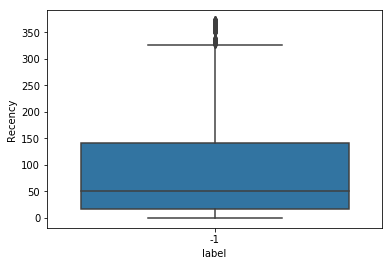

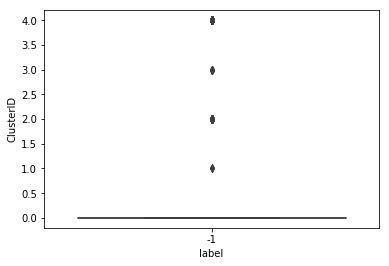

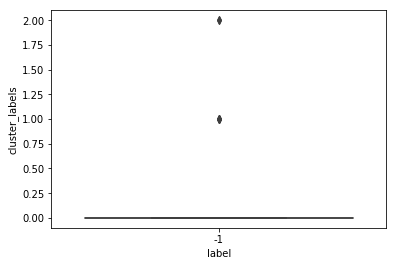

In [37]:
for c in RMF1.columns[:-1]:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=RMF1, y=c, x='label')
    plt.show()

# Hence We can Conclude that K-Means is Best Suitable Algorithm